In [1]:
#import matplotlib
#matplotlib.use('TkAgg')
#%matplotlib inline
#%matplotlib nbagg
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import pandas
from pandas.tools.plotting import scatter_matrix
url = "https://goo.gl/vhm1eU"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pandas.read_csv(url, names=names)

In [3]:
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.plot(kind="box")
plt.show()

<IPython.core.display.Javascript object>

In [6]:
data.hist()
plt.show()

<IPython.core.display.Javascript object>

In [7]:
# Standardize data (0 mean, 1 stdev)
import numpy
from sklearn.preprocessing import StandardScaler
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

In [8]:
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

In [9]:
# summarize transformed data
numpy.set_printoptions(precision=3)
print(rescaledX[0:5,:])
print("mean=",rescaledX.mean())
print("std=",rescaledX.std())
print("min=",rescaledX.min())
print("max=",rescaledX.max())

[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]
mean= 8.86154575645e-17
std= 1.0
min= -4.06047387267
max= 6.65283937837


In [10]:
from sklearn import preprocessing as prep
X_scaled = prep.scale(X, with_mean=True, with_std=True, axis=0)
X_scaled.mean(axis=0)

array([ -6.476e-17,  -9.252e-18,   1.503e-17,   1.006e-16,  -3.007e-17,
         2.591e-16,   2.452e-16,   1.931e-16])

In [11]:
X_scaled.std(axis=0)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [12]:
print(X_scaled[0:5])

[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]


In [13]:
# data normalization
X_normalized = prep.normalize(X)
print(X_normalized[0:5,:])

[[ 0.034  0.828  0.403  0.196  0.     0.188  0.004  0.28 ]
 [ 0.008  0.716  0.556  0.244  0.     0.224  0.003  0.261]
 [ 0.04   0.924  0.323  0.     0.     0.118  0.003  0.162]
 [ 0.007  0.588  0.436  0.152  0.622  0.186  0.001  0.139]
 [ 0.     0.596  0.174  0.152  0.731  0.188  0.01   0.144]]


In [14]:
print("mean=",X_normalized.mean())
print("std=",X_normalized.std())
print("min=",X_normalized.min())
print("max=",X_normalized.max())

mean= 0.240546895797
std= 0.259108453977
min= 0.0
max= 0.973682215504


In [15]:
# Binarization
X_binarized = prep.binarize(X)
print(X_binarized[0:5,:])

[[ 1.  1.  1.  1.  0.  1.  1.  1.]
 [ 1.  1.  1.  1.  0.  1.  1.  1.]
 [ 1.  1.  1.  0.  0.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.]
 [ 0.  1.  1.  1.  1.  1.  1.  1.]]


In [16]:
print("mean=",X_binarized.mean())
print("std=" ,X_binarized.std())
print("min=" ,X_binarized.min())
print("max=" ,X_binarized.max())

mean= 0.875813802083
std= 0.329793854042
min= 0.0
max= 1.0


In [17]:
# Algorithm evaluation with Resampling methods
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [18]:
# KFold
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
results_kfold = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results_kfold.mean()*100.0, results_kfold.std()*100.0))

Accuracy: 76.951% (4.841%)


In [19]:
# Leave One Out (LOO)
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
results_loo = cross_val_score(model, X, Y, cv=loo)
print("Accuracy: %.3f%% (%.3f%%)" % (results_loo.mean()*100.0, results_loo.std()*100.0))

Accuracy: 76.953% (42.113%)


In [20]:
# Cross Validation Classification LogLoss
scoring = 'neg_log_loss'
results_neg = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Logloss: %.3f (%.3f)" % (results_neg.mean(), results_neg.std()))

Logloss: -0.493 (0.047)


In [21]:
results_acc = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.3f (%.3f)" % (results_acc.mean(), results_acc.std()))

Accuracy: 0.770 (0.048)


In [22]:
# Accuracy score metric
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

predicted = cross_val_predict(model, X, Y, cv=kfold)
score = accuracy_score(Y, predicted)
print("Accuracy score: %.3f " % score)

Accuracy score: 0.770 


In [23]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(Y, predicted)

array([[446,  54],
       [123, 145]])

In [24]:
from sklearn.metrics import classification_report

print(classification_report(Y, predicted))

             precision    recall  f1-score   support

        0.0       0.78      0.89      0.83       500
        1.0       0.73      0.54      0.62       268

avg / total       0.76      0.77      0.76       768



In [25]:
# Root mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(Y, predicted)**0.5

0.48007160924178799

In [26]:
# RSquared
from sklearn.metrics import r2_score
r2_score(Y, predicted)

-0.014447761194029685

In [27]:
# Lesson 9: Spot-check Algorithms
# KNN Regression
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
url = "https://goo.gl/sXleFv"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataframe = read_csv(url, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:, 13]

In [29]:
kfold = KFold(n_splits=10, random_state=7)
model = KNeighborsRegressor()
scoring = 'neg_mean_squared_error'
res_knn = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(res_knn.mean())

-107.28683898


In [30]:
# spot-check linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
scoring = 'neg_mean_squared_error'
res_lr = cross_val_score(lr, X, Y, cv=kfold, scoring=scoring)
print(res_lr.mean())

-34.7052559445


In [31]:
# spot-check Logistic regression with Iris dataset
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
Y = iris.target
logr = LogisticRegression()
scoring = 'neg_mean_squared_error'
res_logr = cross_val_score(logr, X, Y, cv=kfold, scoring=scoring)
print(res_logr.mean())

-0.12


In [32]:
# spot check linear discriminate analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X = iris.data
Y = iris.target
lda = LinearDiscriminantAnalysis()
scoring = 'neg_mean_squared_error'
res_lda = cross_val_score(lda, X, Y, cv=kfold, scoring=scoring)
print(res_lda.mean())

-0.0333333333333


C:\Program Files\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:455: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:455: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:455: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:455: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:455: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:455: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


In [33]:
# SVM spot-checking
from sklearn.svm import SVR
from sklearn import datasets
url = "https://goo.gl/sXleFv"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataframe = read_csv(url, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:, 13]

svr = SVR()
scoring = 'neg_mean_squared_error'
res_svr = cross_val_score(svr, X,Y, cv=kfold, scoring=scoring)
print(res_svr.mean())

-91.0478243332


In [34]:
# CART spot-checking
from sklearn import tree
cart = tree.DecisionTreeRegressor()
scoring = 'neg_mean_squared_error'
res_cart = cross_val_score(cart, X,Y, cv=kfold, scoring=scoring)
print(res_cart.mean())

-36.8722615686


In [35]:
# Random forest spot-checking
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
scoring = 'neg_mean_squared_error'
res_rf = cross_val_score(rf, X, Y, cv=kfold, scoring=scoring)
print(res_rf.mean())

-23.9467205922


In [36]:
# Stochastic gradient boosting spot-checking
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
scoring = 'neg_mean_squared_error'
res_gbr = cross_val_score(gbr, X, Y, cv=kfold, scoring=scoring)
print(res_gbr.mean())

-18.6612111175


In [1]:
# Lesson 10: Model Comparison and Selection
# Compare Algorithms
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#load dataset
url = "https://goo.gl/vhm1eU"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:, 8]

#evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

In [5]:
# Non-linear algorithms
from sklearn import tree
from sklearn.svm import SVC

#prepare models
models =[]
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART',tree.DecisionTreeClassifier()))
models.append(('SVC',SVC()))

In [6]:
results = []
for name, model in models:
        kfold = KFold(n_splits=10, random_state=7)
        cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" %(name, cv_results.mean(), cv_results.std())
        print(msg)

LR: 0.769515 (0.048411)
LDA: 0.773462 (0.051592)
CART: 0.696565 (0.059489)
SVC: 0.651025 (0.072141)
SVC-p: 0.651025 (0.072141)


In [70]:
scoring = 'neg_mean_squared_error'

<IPython.core.display.Javascript object>


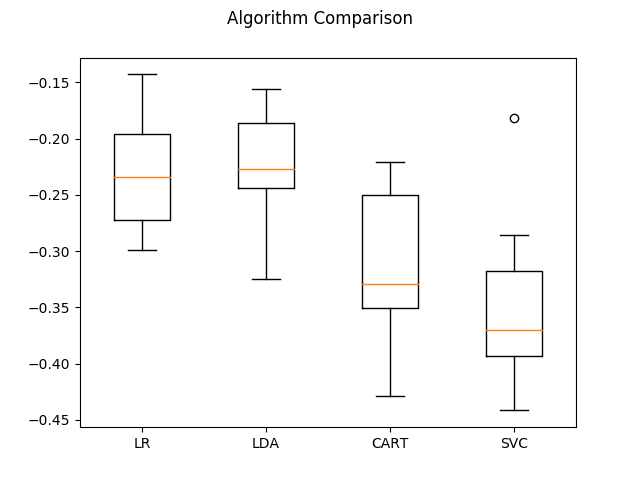

In [73]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [2]:
# Lesson 11: Improve Accuracy with Algorithm Tuning
#Grid search for Algorithm Tuning
from pandas import read_csv
import numpy
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

url = "https://goo.gl/vhm1eU"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:, 0:8]
Y = array[:,8]

In [323]:
alphas = numpy.array([1, 0.1, 0.01, 0.001, 0.0001, 0])
param_grid = dict(alpha=alphas)
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X,Y)
print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.279617559313
1.0


In [324]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
import scipy.stats as stats

# specify parameters and distributions to sample from
param_dist = dict(alpha=stats.uniform(0.0001,2.0).rvs(20))

In [326]:
n_iter_search = 20
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=n_iter_search)

random_search.fit(X,Y)
print(random_search.best_score_)
print(random_search.best_estimator_.alpha)

0.279629769512
1.72952399795


In [2]:
# Lesson 12: Improve accuracy with Ensemble Predictions

# Random Forest Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
url = "https://goo.gl/vhm1eU"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:, 0:8]
Y = array[:,8]

In [4]:
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=7)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.764268626111


In [13]:
# Extra trees classification
from sklearn.ensemble import ExtraTreesClassifier
et_model = ExtraTreesClassifier(n_estimators = num_trees, max_features=max_features)
et_results = cross_val_score(et_model, X, Y, cv=kfold)
print(et_results.mean())

0.761671223513


In [15]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
num_estimators = 100
gb_model = GradientBoostingClassifier(n_estimators = num_estimators, max_features=max_features)
gb_results = cross_val_score(gb_model, X, Y, cv=kfold)
print(gb_results.mean())

0.774675324675


In [18]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
num_estimators = 100
ab_model = AdaBoostClassifier(n_estimators = num_estimators)
ab_results = cross_val_score(ab_model, X, Y, cv=kfold)
print(ab_results.mean())

0.742156527683


In [21]:
# Voting ensemble
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

lr_clf = LogisticRegression(random_state=1)
rf_clf = RandomForestClassifier(random_state=1)
gnb_clf = GaussianNB()

eclf1 = VotingClassifier(estimators = [
    ('lr',lr_clf),('rf', rf_clf), ('gnb',gnb_clf)
], voting = 'hard')

eclf2 = VotingClassifier(estimators = [
    ('lr',lr_clf),('rf', rf_clf), ('gnb',gnb_clf)
], voting = 'soft')

ev1_results = cross_val_score(eclf1, X, Y, cv=kfold)
ev2_results = cross_val_score(eclf2, X,Y,cv=kfold)

print(ev1_results.mean())
print(ev2_results.mean())

0.766883116883
0.768181818182


In [22]:
# Voting ensemble #2

eclf3 = VotingClassifier(estimators = [
    ('rf',model),('et', et_model), ('gb',gb_model), ('ab',ab_model)
], voting = 'hard')
eclf4 = VotingClassifier(estimators = [
    ('rf',model),('et', et_model), ('gb',gb_model), ('ab',ab_model)
], voting = 'soft')

ev3_results = cross_val_score(eclf3, X, Y, cv=kfold)
ev4_results = cross_val_score(eclf4, X,Y,cv=kfold)

print(ev3_results.mean())
print(ev4_results.mean())

0.768164730007
0.782467532468
